# Assignment 2 - Data Analysis Recipes : Fitting a model to data

- Paras Sharma, 2019PH10644
- Mayand Dangi, 2019PH10637

In [1]:
using Plots
using LinearAlgebra
using CSV, DataFrames
using BAT

## Excercises 1-3 :- Fitting a Polynomial to the Given Data

In [2]:
data = CSV.read("data.csv", DataFrame)

Row,ID,x,y,sig_y,sig_x,rho_xy
,Int64,Int64,Int64,Int64,Int64,Float64
1,1,201,592,61,9,-0.84
2,2,244,401,25,4,0.31
3,3,47,583,38,11,0.64
4,4,287,402,15,7,-0.27
5,5,203,495,21,5,-0.33
6,6,58,173,15,9,0.67
7,7,210,479,27,4,-0.02
8,8,202,504,14,4,-0.05
9,9,198,510,30,11,-0.84


## Excercise 1 :- data from ID 5 to 20

In [3]:
function least_square_fit(data)
    Y = data.y
    A = hcat(ones(length(Y)), data.x)
    C = Diagonal(data.sig_y.^2)

    # least square fit

    X = inv(A' * inv(C) * A) * (A' * inv(C) * Y)
    
    slope = X[2]
    intercept = X[1]
    slope_uncertainty = sqrt(inv(A' * inv(C) * A)[2,2])
    intercept_uncertainty = sqrt(inv(A' * inv(C) * A)[1,1])

    return slope, slope_uncertainty, intercept, intercept_uncertainty

end


least_square_fit (generic function with 1 method)

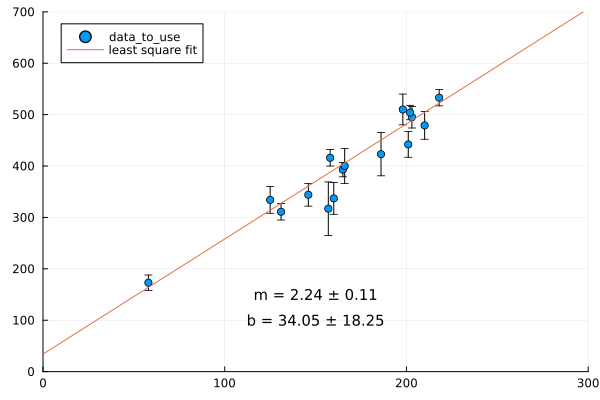

In [4]:
data_to_use = data[data.ID.>4, :]

slope, slope_uncertainty, intercept, intercept_uncertainty = least_square_fit(data_to_use)

plot(data_to_use.x, data_to_use.y, yerr=data_to_use.sig_y, seriestype=:scatter, label="data_to_use")
plot!((0:1:300), (x -> slope * x + intercept).(0:1:300), label="least square fit")
xlims!(0, 300)
ylims!(0, 700)
annotate!(150, 150, text("m = $(round(slope, digits=2)) ± $(round(slope_uncertainty, digits=2))", 10))
annotate!(150, 100, text("b = $(round(intercept, digits=2)) ± $(round(intercept_uncertainty, digits=2))", 10))

## Excercise 2 :- data from ID 1 to 20

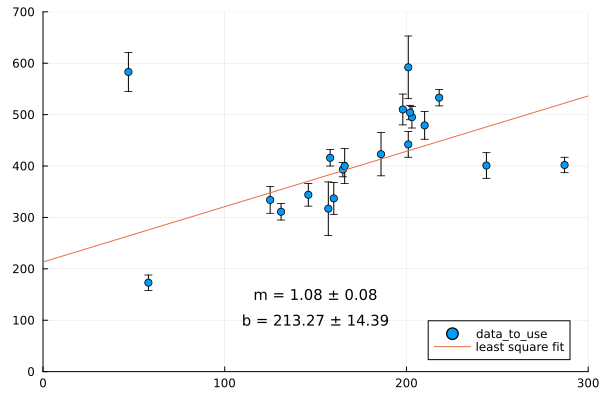

In [5]:
data_to_use = data
slope, slope_uncertainty, intercept, intercept_uncertainty = least_square_fit(data_to_use)
plot(data_to_use.x, data_to_use.y, yerr=data_to_use.sig_y, seriestype=:scatter, label="data_to_use")
plot!((0:1:300),(x -> slope*x + intercept).(0:1:300), label="least square fit")
xlims!(0, 300)
ylims!(0, 700)
annotate!(150, 150, text("m = $(round(slope, digits=2)) ± $(round(slope_uncertainty, digits=2))", 10))
annotate!(150,100, text("b = $(round(intercept, digits=2)) ± $(round(intercept_uncertainty, digits=2))", 10))

## Excercise 3 :- Quadradic fit with data from ID 5 to 20

In [6]:
function quadratic_fit(data)
    Y = data.y
    A = hcat(ones(length(Y)), data.x, data.x.^2)
    C = Diagonal(data.sig_y.^2)

    # quadratic_fit
    X = inv(A' * inv(C) * A) * (A' * inv(C) * Y)
    
    b = X[1]
    m = X[2]
    q = X[3]
    b_uncertainty = sqrt(inv(A' * inv(C) * A)[1,1])
    m_uncertainty = sqrt(inv(A' * inv(C) * A)[2,2])
    q_uncertainty = sqrt(inv(A' * inv(C) * A)[3,3])

    return b, b_uncertainty, m, m_uncertainty, q, q_uncertainty
end

quadratic_fit (generic function with 1 method)

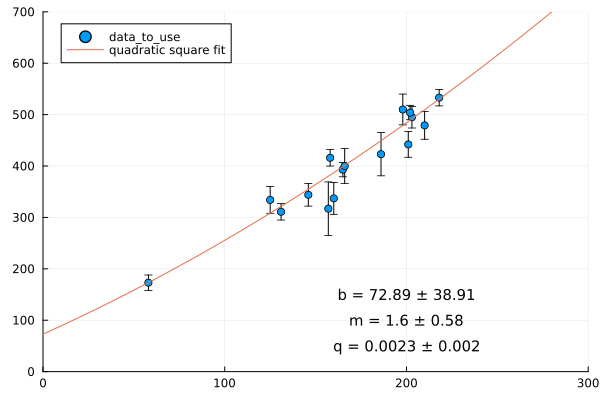

In [7]:
data_to_use = data[data.ID .> 4, :]
b, b_uncertainty, m, m_uncertainty, q, q_uncertainty = quadratic_fit(data_to_use)
plot(data_to_use.x, data_to_use.y, yerr=data_to_use.sig_y, seriestype=:scatter, label="data_to_use")
plot!((0:1:300),(x -> q*x^2 + m*x + b).(0:1:300), label="quadratic square fit")
xlims!(0, 300)
ylims!(0, 700)
annotate!(200, 150, text("b = $(round(b, digits=2)) ± $(round(b_uncertainty, digits=2))", 10))
annotate!(200, 100, text("m = $(round(m, digits=2)) ± $(round(m_uncertainty, digits=2))", 10))
annotate!(200, 50, text("q = $(round(q, digits=4)) ± $(round(q_uncertainty, digits=4))", 10))

## Exercise 4 :- 
We have, 
$$p(t_i|\sigma_{ti}, T) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\Biggl(-\frac{(t_i - T)^2}{2\sigma_{ti}^2}\Biggr)$$ 
Let us consider each measurment has conditional independency, then we can write likelihood function as,
$$\mathcal{L} = \prod_{i=1}^N p(t_i|\sigma_{ti}, T) $$ 
$$\mathcal{L} = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\Biggl(-\frac{(t_i - T)^2}{2\sigma_{ti}^2}\Biggr)$$
Taking, log both sides we'll have,
$$\ln \mathcal{L} = \ln \Biggl[\prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\Biggl(-\frac{(t_i - T)^2}{2\sigma_{ti}^2}\Biggr)\Biggr]$$
$$\ln \mathcal{L} = \sum_{i=1}^N \ln \Biggl[\frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\Biggl(-\frac{(t_i - T)^2}{2\sigma_{ti}^2}\Biggr) \Biggr]$$
$$ln \mathcal{L} = \sum_{i=1}^N \Biggl[\ln \Bigl(\frac{1}{\sqrt{2\pi\sigma_{ti}^2}}\Bigr) -\Bigl(\frac{(t_i - T)^2}{2\sigma_{ti}^2}\Bigr)\Biggr]$$
$$ln \mathcal{L} = \sum_{i=1}^N \Biggl[\ln \Bigl(\frac{1}{\sqrt{2\pi\sigma_{ti}^2}}\Bigr) \Biggr] - \sum_{i=1}^N \Biggl[\Bigl(\frac{(t_i - T)^2}{2\sigma_{ti}^2}\Bigr)\Biggr]$$
$$ln \mathcal{L} = K - \sum_{i=1}^N \frac{(t_i - T)^2}{2\sigma_{ti}^2}$$

For maximizing the likelihood function, we have to find condition on T such that $$\frac{\partial \mathcal{L}}{\partial T} = 0$$.
$$\frac{\partial \mathcal{L}}{\partial T} = - \sum_{i=1}^N \frac{\partial}{\partial T} \frac{(t_i - T)^2}{2\sigma_{ti}^2}$$
$$\frac{\partial \mathcal{L}}{\partial T} = - \sum_{i=1}^N \frac{-2(t_i - T)}{2\sigma_{ti}^2}$$
$$\frac{\partial \mathcal{L}}{\partial T} = \sum_{i=1}^N \frac{(t_i - T)}{\sigma_{ti}^2}$$
$$\frac{\partial \mathcal{L}}{\partial T} = \sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2} - \sum_{i=1}^N \frac{T}{\sigma_{ti}^2}$$
For maxima of likelihood function,
$$\frac{\partial \mathcal{L}}{\partial T} = \sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2} - \sum_{i=1}^N \frac{T}{\sigma_{ti}^2}=0$$
$$\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2} - \sum_{i=1}^N \frac{T}{\sigma_{ti}^2}=0$$
$$\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2} = \sum_{i=1}^N \frac{T}{\sigma_{ti}^2}$$
$$T = \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{ti}^2}}$$
Also, T is the weighted mean.

## Exercise 5:-
We have,
$$\chi^2 = [\mathbf{Y}-\mathbf{A}\mathbf{X}]^T\mathbf{C}^{-1}[\mathbf{Y}-\mathbf{A}\mathbf{X}]$$
$$\chi^2 = [\mathbf{Y}^T-\mathbf{X}^T\mathbf{A}^T]\mathbf{C}^{-1}[\mathbf{Y}-\mathbf{A}\mathbf{X}]$$
Taking derviative w.r.t. $\mathbf{X}$ and equating to zero.
$$\frac{\partial}{\partial \mathbf{X}} \chi^2 =\frac{\partial}{\partial \mathbf{X}} [\mathbf{Y}^T-\mathbf{X}^T\mathbf{A}^T]\mathbf{C}^{-1}[\mathbf{Y}-\mathbf{A}\mathbf{X}]$$
$$\frac{\partial}{\partial \mathbf{X}} \chi^2 =[-\mathbf{A}^T]\mathbf{C}^{-1}[\mathbf{Y}-\mathbf{A}\mathbf{X}] + ([\mathbf{Y}^T-\mathbf{X}^T\mathbf{A}^T]\mathbf{C}^{-1}[-\mathbf{A}])^T = 0$$
$$[-\mathbf{A}^T]\mathbf{C}^{-1}[\mathbf{Y}-\mathbf{A}\mathbf{X}] + ([\mathbf{Y}^T-\mathbf{X}^T\mathbf{A}^T]\mathbf{C}^{-1}[-\mathbf{A}])^T = 0$$
Since $\mathbf{C} = \mathbf{C}^T$
$$2[-\mathbf{A}^T]\mathbf{C}^{-1}[\mathbf{Y}-\mathbf{A}\mathbf{X}] = 0$$
$$[\mathbf{A}^T\mathbf{C}^{-1}\mathbf{Y}]-[\mathbf{A}^T\mathbf{C}^{-1}\mathbf{A}\mathbf{X}] = 0$$
$$[\mathbf{A}^T\mathbf{C}^{-1}\mathbf{A}\mathbf{X}] = [\mathbf{A}^T\mathbf{C}^{-1}\mathbf{Y}]$$
$$\mathbf{X} =[\mathbf{A}^T\mathbf{C}^{-1}\mathbf{A}]^{-1} [\mathbf{A}^T\mathbf{C}^{-1}\mathbf{Y}]$$

## Exercise 6:- Finding the best fit with Monte Carlo Markov Chain

In [86]:
using CSV, DataFrames, Plots, Statistics, Measures

# function mcmc_fitting_linear_with_outliers(data; iterations = 10000000, samples = 1000000, init_params = [100.0, 1.0, 0.5, 0, 10])

data = CSV.read("data.csv", DataFrame)
# data = data[data.ID .> 4, :]
iterations = 1E6
samples = 9E5
init_params = [30, 2.24, 0.25, mean(data.y), std(data.y)^2] # b, m, Pb, Yb, Vb

function test_distribution(x, y, sig_y, b, m, Pb, Yb, Vb)
    return ((1 - Pb) / (sqrt(2 * pi) * sig_y)) * exp(-0.5 * ((y - m * x - b) / sig_y)^2) + (Pb / (sqrt(2 * pi * abs(Vb + sig_y^2)))) * exp(-0.5 * ((y - Yb)^2 / abs(Vb + sig_y^2)))
end

function likelihood(data, b, m, Pb, Yb, Vb)
    x = data.x
    y = data.y
    sig_y = data.sig_y
    return prod([test_distribution(x[i], y[i], sig_y[i], b, m, Pb, Yb, Vb) for i in 1:length(y)])
end

sampled_params = []
params = init_params

#TODO:- Need to parallelize this

for i in 1:iterations
    # println("Iteration: ", i, "params: ", params)
    params_new = params + randn(5)
    
    params_new[3] = rand() # Pb
    params_new[5] = rand() + params[5] # Vb

    likelihood_old = likelihood(data, params[1], params[2], params[3], params[4], params[5])
    likelihood_new = likelihood(data, params_new[1], params_new[2], params_new[3], params_new[4], params_new[5])

    if rand() < likelihood_new / likelihood_old
        global params = params_new
    end

    if i > (iterations - samples)
        push!(sampled_params, params)
    end
end

#     return sampled_params

# end

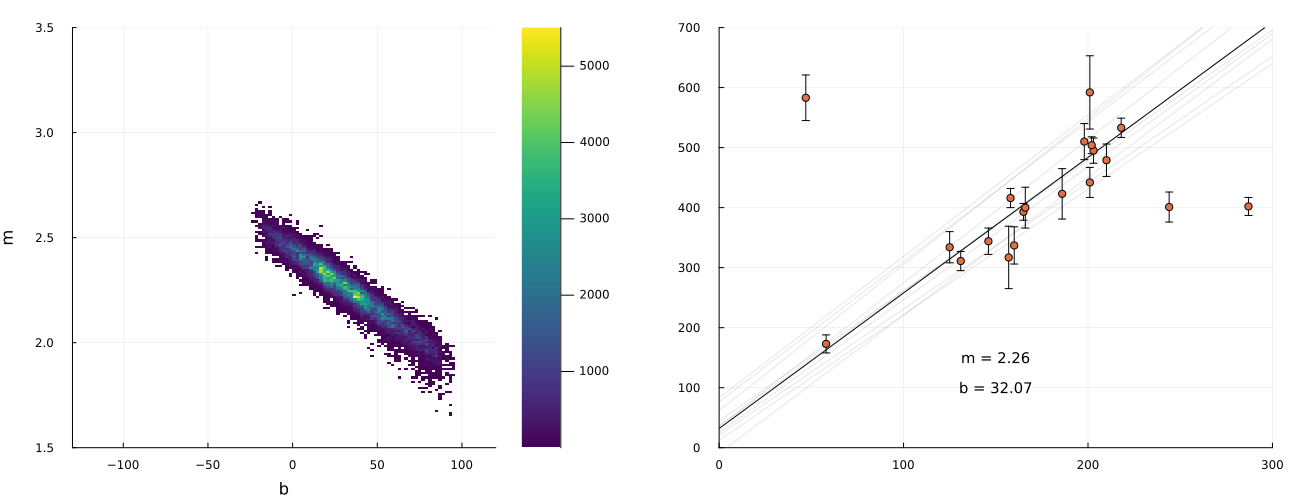

In [87]:
hist_bm = histogram2d([s[1] for s in sampled_params], [s[2] for s in sampled_params], bins=100, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.5))

## best fit line
b_best = mean([s[1] for s in sampled_params])
m_best = mean([s[2] for s in sampled_params])
plot_lines = plot(x -> m_best*x + b_best, 0, 300, color = :black, alpha = 1)
plot_lines = plot!(data.x, data.y, yerr=data.sig_y, seriestype=:scatter)

## Draw 10 lines from the posterior distribution
for i in 1:10
    b = rand([s[1] for s in sampled_params])
    m = rand([s[2] for s in sampled_params])
    plot_lines = plot!(x -> m*x + b, 0, 300, color = :black, alpha = 0.1, xlims = (0,300), ylims = (0,700))
end

plot_lines = annotate!(150, 150, text("m = $(round(m_best, digits=2))", 10))
plot_lines = annotate!(150,100, text("b = $(round(b_best, digits=2))", 10))

plot(hist_bm, plot_lines, legend = false, size = (1300, 500), padding = 5, layout = (1,2), margin = 5mm)


### Exercise 7:- Probability of the data being bad plots

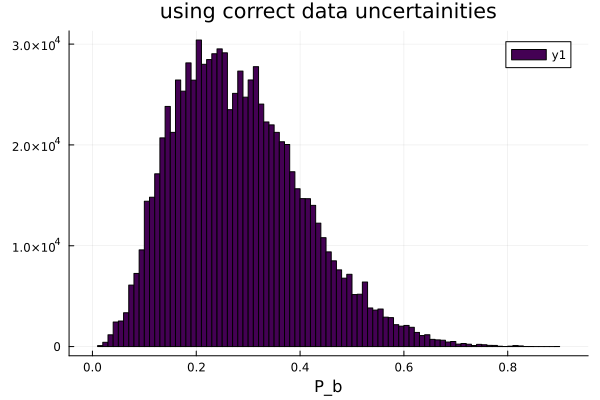

In [88]:
## Plot with marginalization over m, b, Vb, Yb
histogram([s[3] for s in sampled_params], bins=100, c=:viridis, xlabel="P_b", title = "using correct data uncertainities", density = true)

In [92]:
using CSV, DataFrames, Plots, Statistics, Measures

# function mcmc_fitting_linear_with_outliers(data; iterations = 10000000, samples = 1000000, init_params = [100.0, 1.0, 0.5, 0, 10])

data = CSV.read("data.csv", DataFrame)
data.sig_y = data.sig_y/2
# data = data[data.ID .> 4, :]
iterations = 1E6
samples = 9E5
init_params = [30, 2.24, 0.25, mean(data.y)/2, std(data.y)^2/4] # b, m, Pb, Yb, Vb

function test_distribution(x, y, sig_y, b, m, Pb, Yb, Vb)
    return ((1 - Pb) / (sqrt(2 * pi) * sig_y)) * exp(-0.5 * ((y - m * x - b) / sig_y)^2) + (Pb / (sqrt(2 * pi * abs(Vb + sig_y^2)))) * exp(-0.5 * ((y - Yb)^2 / abs(Vb + sig_y^2)))
end

function likelihood(data, b, m, Pb, Yb, Vb)
    x = data.x
    y = data.y
    sig_y = data.sig_y
    return prod([test_distribution(x[i], y[i], sig_y[i], b, m, Pb, Yb, Vb) for i in 1:length(y)])
end

sampled_params = []
params = init_params

#TODO:- Need to parallelize this

for i in 1:iterations
    # println("Iteration: ", i, "params: ", params)
    
    params_new = params + randn(5)

    params_new[3] = rand() # Pb

    if params_new[5] < 0 # Vb
        params_new[5] = -params_new[5]
    end


    likelihood_old = likelihood(data, params[1], params[2], params[3], params[4], params[5])
    likelihood_new = likelihood(data, params_new[1], params_new[2], params_new[3], params_new[4], params_new[5])

    if rand() < likelihood_new / likelihood_old
        global params = params_new
    end

    if i > (iterations - samples)
        push!(sampled_params, params)
    end
end

#     return sampled_params

# end

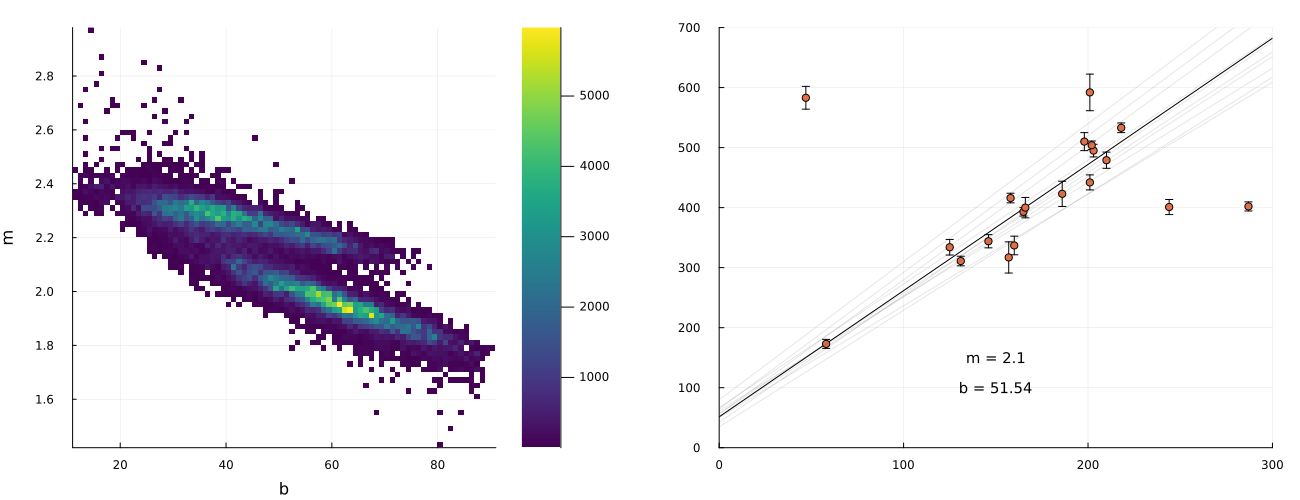

In [93]:
hist_bm = histogram2d([s[1] for s in sampled_params], [s[2] for s in sampled_params], bins=100, c=:viridis, xlabel="b", ylabel="m")#, xlims = (-130,120), ylims = (1.5,3.5))

## best fit line
b_best = mean([s[1] for s in sampled_params])
m_best = mean([s[2] for s in sampled_params])
plot_lines = plot(x -> m_best*x + b_best, 0, 300, color = :black, alpha = 1)
plot_lines = plot!(data.x, data.y, yerr=data.sig_y, seriestype=:scatter)

## Draw 10 lines from the posterior distribution
for i in 1:10
    b = rand([s[1] for s in sampled_params])
    m = rand([s[2] for s in sampled_params])
    plot_lines = plot!(x -> m*x + b, 0, 300, color = :black, alpha = 0.1, xlims = (0,300), ylims = (0,700))
end

plot_lines = annotate!(150, 150, text("m = $(round(m_best, digits=2))", 10))
plot_lines = annotate!(150,100, text("b = $(round(b_best, digits=2))", 10))

plot(hist_bm, plot_lines, legend = false, size = (1300, 500), padding = 5, layout = (1,2), margin = 5mm)


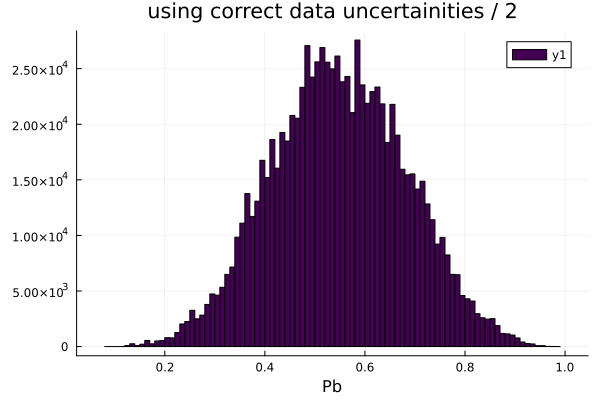

In [94]:
## Plot with marginalization over m, b, Vb, Yb using data uncertaintities / 2
histogram([s[3] for s in sampled_params], bins=100, c=:viridis, xlabel="Pb", title = "using correct data uncertainities / 2")

## Excercise 8:- Finding the best fit with Monte Carlo Markov Chain

In [176]:
using Pandas, CSV, DataFrames, Plots, Statistics, LinearAlgebra

function least_square_fit(data)
    x = Array(data.x)
    Y = Array(data.y)
    sig_y = Array(data.sig_y)
    A = hcat(ones(length(Y)), x)
    C = Diagonal(sig_y .^ 2)

    # least square fit

    X = inv(A' * inv(C) * A) * (A' * inv(C) * Y)

    slope = X[2]
    intercept = X[1]
    slope_uncertainty = sqrt(inv(A' * inv(C) * A)[2, 2])
    intercept_uncertainty = sqrt(inv(A' * inv(C) * A)[1, 1])

    return slope, slope_uncertainty, intercept, intercept_uncertainty

end

data = read_csv("data.csv")

M = 20000
N = length(data.x)


## bootstrap estimate of uncertainty
m_org = least_square_fit(data)[1]
m_vals = []

for i in 1:M
    sample_with_replacement = Pandas.sample(data, N, replace=true)
    m_curr = least_square_fit(sample_with_replacement)[1]
    push!(m_vals, m_curr)
end

sigma_m_bootstrap = sum((m_vals .- m_org).^2) / (M)
println("Original estimate of uncertainty: ", least_square_fit(data)[2])
println("Bootstrap estimate of uncertainty: ", sigma_m_bootstrap)

## jackknife estimate of uncertainty
m_vals = []

for i in 1:N
    sample_without_i = Pandas.sample(data, N, replace=true, ignore_index=i)
    m_curr = least_square_fit(sample_without_i)[1]
    push!(m_vals, m_curr)
end

sigma_m_jackknife = (N - 1) * sum((m_vals .- m_org).^2) / N
println("Jackknife estimate of uncertainty: ", sigma_m_jackknife)


Original estimate of uncertainty: 0.0774067831657561
Bootstrap estimate of uncertainty: 0.3768700452172039
Jackknife estimate of uncertainty: 5.216218497090827


## Excercise 9:- Finding the best fit for inliers with Monte Carlo Markov Chain

### Part a with all inlier points

In [126]:
using CSV, DataFrames, Plots, Statistics, Measures

# function mcmc_fitting_linear_with_outliers(data; iterations = 10000000, samples = 1000000, init_params = [100.0, 1.0, 0.5, 0, 10])

data = CSV.read("data.csv", DataFrame)
# data.sig_y = data.sig_y/2
data = data[data.ID .> 4, :]
iterations = 1E6
samples = 9.9E5
init_params = [30, 2.24, 0.25, mean(data.y)/2, std(data.y)^2/4] # b, m, Pb, Yb, Vb

function test_distribution(x, y, sig_y, b, m, Pb, Yb, Vb)
    return ((1 - Pb) / (sqrt(2 * pi) * sig_y)) * exp(-0.5 * ((y - m * x - b) / sig_y)^2) + (Pb / (sqrt(2 * pi * abs(Vb + sig_y^2)))) * exp(-0.5 * ((y - Yb)^2 / abs(Vb + sig_y^2)))
end

function likelihood(data, b, m, Pb, Yb, Vb)
    x = data.x
    y = data.y
    sig_y = data.sig_y
    return prod([test_distribution(x[i], y[i], sig_y[i], b, m, Pb, Yb, Vb) for i in 1:length(y)])
end

sampled_params = []
params = init_params

#TODO:- Need to parallelize this

for i in 1:iterations
    # println("Iteration: ", i, "params: ", params)
    
    params_new = params + randn(5)

    params_new[3] = rand() # Pb

    params_new[5] = rand() + params[5] # Vb

    # if params_new[5] < 0 # Vb
    #     params_new[5] = -params_new[5]
    # end


    likelihood_old = likelihood(data, params[1], params[2], params[3], params[4], params[5])
    likelihood_new = likelihood(data, params_new[1], params_new[2], params_new[3], params_new[4], params_new[5])

    if rand() < likelihood_new / likelihood_old
        global params = params_new
    end

    if i > (iterations - samples)
        push!(sampled_params, params)
    end
end

#     return sampled_params

# end

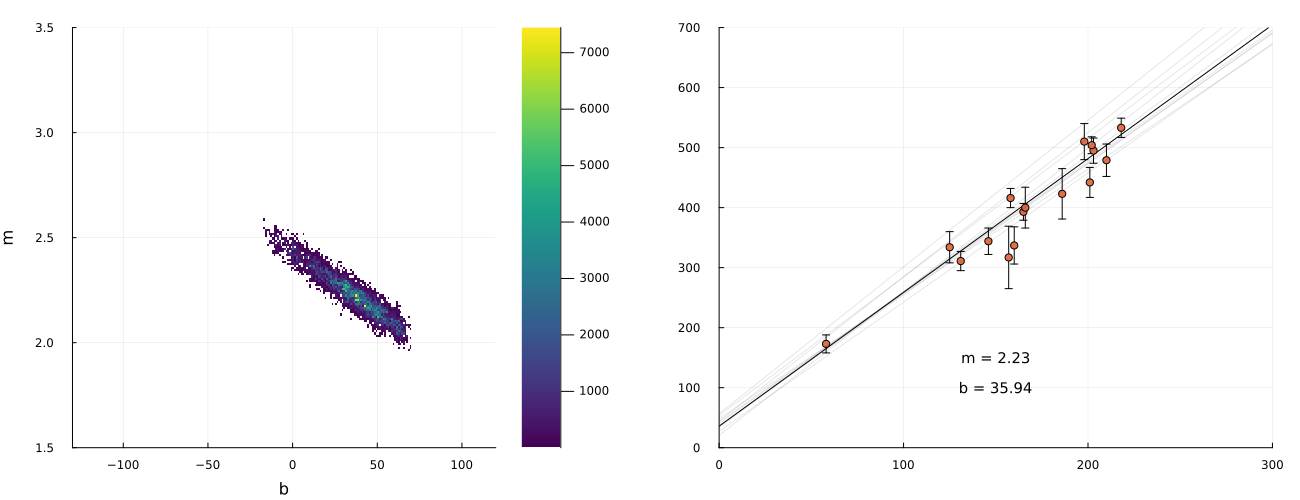

In [127]:
hist_bm = histogram2d([s[1] for s in sampled_params], [s[2] for s in sampled_params], bins=100, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.5))

## best fit line
b_best = mean([s[1] for s in sampled_params])
m_best = mean([s[2] for s in sampled_params])
plot_lines = plot(x -> m_best*x + b_best, 0, 300, color = :black, alpha = 1)
plot_lines = plot!(data.x, data.y, yerr=data.sig_y, seriestype=:scatter)

## Draw 10 lines from the posterior distribution
for i in 1:10
    b = rand([s[1] for s in sampled_params])
    m = rand([s[2] for s in sampled_params])
    plot_lines = plot!(x -> m*x + b, 0, 300, color = :black, alpha = 0.1, xlims = (0,300), ylims = (0,700))
end

plot_lines = annotate!(150, 150, text("m = $(round(m_best, digits=2))", 10))
plot_lines = annotate!(150,100, text("b = $(round(b_best, digits=2))", 10))

plot(hist_bm, plot_lines, legend = false, size = (1300, 500), padding = 5, layout = (1,2), margin = 5mm)


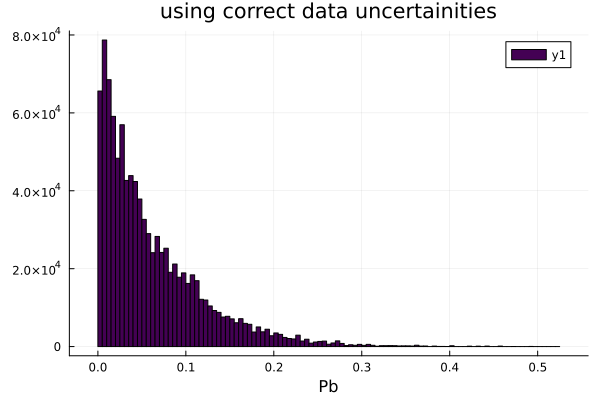

In [128]:
## Plot with marginalization over m, b, Vb, Yb using data uncertaintities / 2
histogram([s[3] for s in sampled_params], bins=100, c=:viridis, xlabel="Pb", title = "using correct data uncertainities")

### Part b with all inlier points and data uncertainties reduced by 2

In [123]:
using CSV, DataFrames, Plots, Statistics, Measures

# function mcmc_fitting_linear_with_outliers(data; iterations = 10000000, samples = 1000000, init_params = [100.0, 1.0, 0.5, 0, 10])

data = CSV.read("data.csv", DataFrame)
data.sig_y = data.sig_y/2
data = data[data.ID .> 4, :]
iterations = 1E6
samples = 9.9E5
init_params = [30, 2.24, 0.25, mean(data.y)/2, std(data.y)^2/4] # b, m, Pb, Yb, Vb

function test_distribution(x, y, sig_y, b, m, Pb, Yb, Vb)
    return ((1 - Pb) / (sqrt(2 * pi) * sig_y)) * exp(-0.5 * ((y - m * x - b) / sig_y)^2) + (Pb / (sqrt(2 * pi * abs(Vb + sig_y^2)))) * exp(-0.5 * ((y - Yb)^2 / abs(Vb + sig_y^2)))
end

function likelihood(data, b, m, Pb, Yb, Vb)
    x = data.x
    y = data.y
    sig_y = data.sig_y
    return prod([test_distribution(x[i], y[i], sig_y[i], b, m, Pb, Yb, Vb) for i in 1:length(y)])
end

sampled_params = []
params = init_params

#TODO:- Need to parallelize this

for i in 1:iterations
    # println("Iteration: ", i, "params: ", params)
    
    params_new = params + randn(5)

    params_new[3] = rand() # Pb

    params_new[5] = rand() + params[5] # Vb

    likelihood_old = likelihood(data, params[1], params[2], params[3], params[4], params[5])
    likelihood_new = likelihood(data, params_new[1], params_new[2], params_new[3], params_new[4], params_new[5])

    if rand() < likelihood_new / likelihood_old
        global params = params_new
    end

    if i > (iterations - samples)
        push!(sampled_params, params)
    end
end

#     return sampled_params

# end

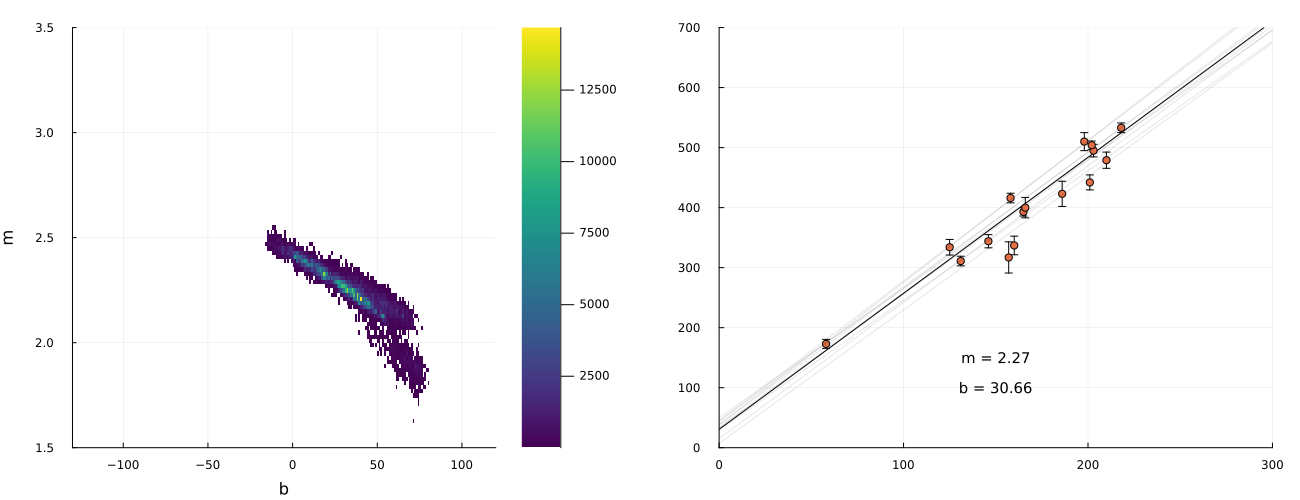

In [124]:
hist_bm = histogram2d([s[1] for s in sampled_params], [s[2] for s in sampled_params], bins=100, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.5))

## best fit line
b_best = mean([s[1] for s in sampled_params])
m_best = mean([s[2] for s in sampled_params])
plot_lines = plot(x -> m_best*x + b_best, 0, 300, color = :black, alpha = 1)
plot_lines = plot!(data.x, data.y, yerr=data.sig_y, seriestype=:scatter)

## Draw 10 lines from the posterior distribution
for i in 1:10
    b = rand([s[1] for s in sampled_params])
    m = rand([s[2] for s in sampled_params])
    plot_lines = plot!(x -> m*x + b, 0, 300, color = :black, alpha = 0.1, xlims = (0,300), ylims = (0,700))
end

plot_lines = annotate!(150, 150, text("m = $(round(m_best, digits=2))", 10))
plot_lines = annotate!(150,100, text("b = $(round(b_best, digits=2))", 10))

plot(hist_bm, plot_lines, legend = false, size = (1300, 500), padding = 5, layout = (1,2), margin = 5mm)


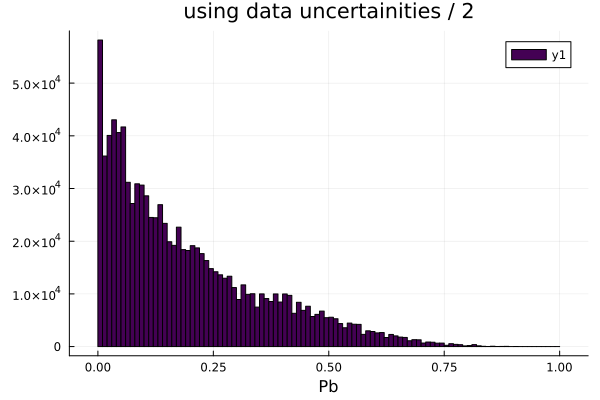

In [125]:
## Plot with marginalization over m, b, Vb, Yb using data uncertaintities / 2
histogram([s[3] for s in sampled_params], bins=100, c=:viridis, xlabel="Pb", title = "using data uncertainities / 2")

## Excercise 10
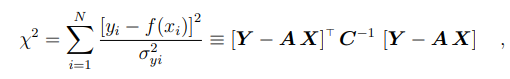 \
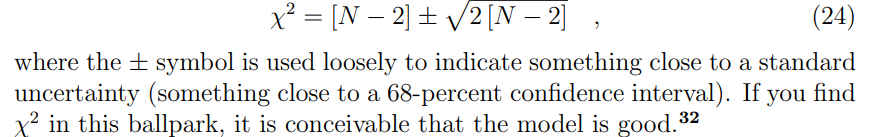

In [36]:
function get_chi2_ex1(x, Y, sigma_y2)
    A = hcat(ones(size(x)), x)
    C = Matrix(spdiagm(0 => sigma_y2))
    X = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    chi = transpose(Y-A*X)*inv(C)*(Y-A*X)
    return chi
end

function get_chi2_ex3(x, Y, sigma_y2)
    Q = hcat(ones(size(x)), x, x.^2)
    C = Matrix(spdiagm(0 => sigma_y2))
    X, _ = bestfit_line_quadratic(x, Y, sigma_y2)
    chi = transpose(Y-Q*X)*inv(C)*(Y-Q*X)
    return chi
end

function get_chi2_range(N)
    return [(N-2)-sqrt(2*(N-2)), (N-2)+sqrt(2*(N-2))]
end

get_chi2_range (generic function with 1 method)

In [37]:
# chi^2 value for excercise 1
println("chi_2 =",get_chi2_ex1(x, Y, C))

# chi^2 range for excercise 1
println("chi_2 range =",get_chi2_range(size(x)[1]))

chi_2 =18.68076991124081
chi_2 range =[8.708497377870819, 19.29150262212918]


In [38]:
# chi^2 value for excercise 1
println("chi_2 =",get_chi2_ex1(x_2, Y_2, sigma_y2))

# chi^2 range for excercise 1
println("chi_2 range =",get_chi2_range(size(x_2)[1]))

chi_2 =289.96372278199925
chi_2 range =[12.0, 24.0]


In [39]:
# chi^2 value for excercise 1
println("chi_2 =",get_chi2_ex3(x_3, Y_3, sigma_y3))

# chi^2 range for excercise 1
println("chi_2 range =",get_chi2_range(size(x_3)[1]))

chi_2 =17.403171914904352
chi_2 range =[8.708497377870819, 19.29150262212918]


## Excercise 11

In [40]:
function get_chi2_ex1(x, Y, sigma_y)
    A = hcat(ones(size(x)), x)
    C = Matrix(spdiagm(0 => sigma_y))
    X = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    chi = transpose(Y-A*X)*inv(C)*(Y-A*X)
    return chi
end

get_chi2_ex1 (generic function with 1 method)

In [41]:
# for finding optimal value of S for which chi^2 = N-2
# we'll plot the graph of S vs chi^2 to find the solution

A = hcat(ones(size(x)), x)
S = []
chi2 = []

for s in 1:1000
    C = s*Matrix(1I, size(x)[1], size(x)[1])
    X = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    ch = transpose(Y-A*X)*inv(C)*(Y-A*X)
    push!(S, s)
    push!(chi2, ch)
end

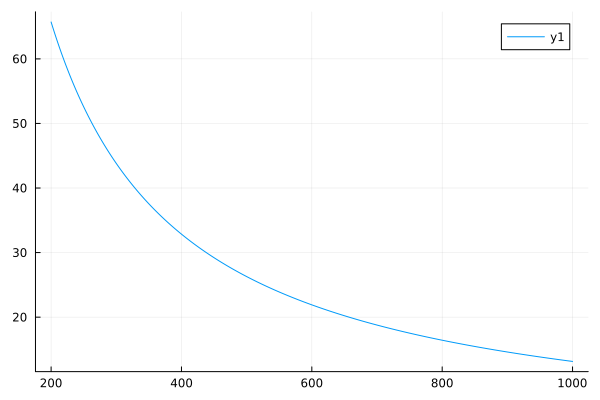

In [42]:
plot(S[200:size(S)[1]], chi2[200:size(chi2)[1]])

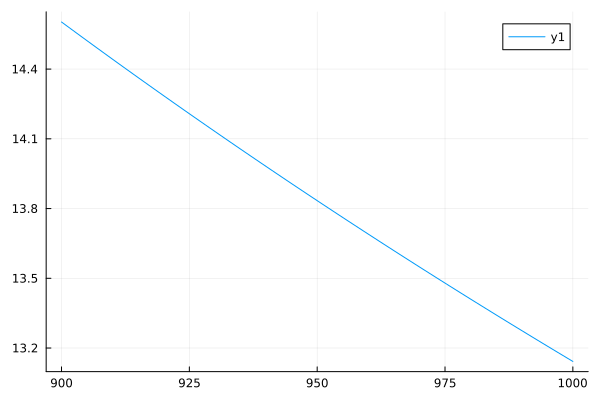

In [43]:
plot(S[900:size(S)[1]], chi2[900:size(chi2)[1]])

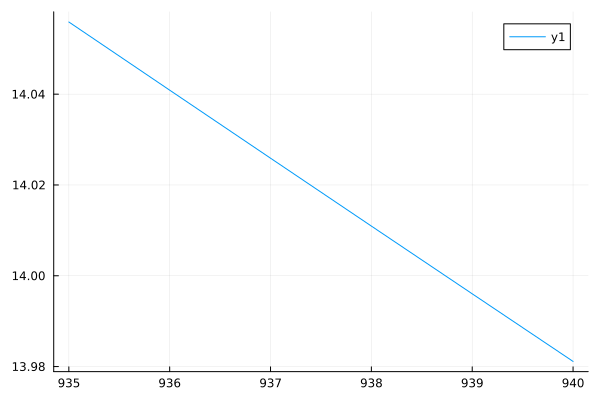

In [44]:
plot(S[935:940], chi2[935:940])

In [45]:
# value of S for which chi^2 = N-2
S = (14-chi2[939])*(939-938)/(chi2[939]-chi2[938])+939

938.7335017864546

In [46]:
println("Mean of sigma_y^2 = ", Statistics.mean(C))
println("Median of sigma_y^2 = ", Statistics.median(C))

Mean of sigma_y^2 = 62.5
Median of sigma_y^2 = 0.0
